In [51]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import filedialog
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


In [14]:
data = pd.read_csv('C:/Users/anton/Downloads/kunskapskontroll_ai2_del1/kunskapskontroll_ai2_del1/housing.csv')
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)

In [15]:
print(data.head())
print(data.info())
print(data.describe())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1     

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\anton\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


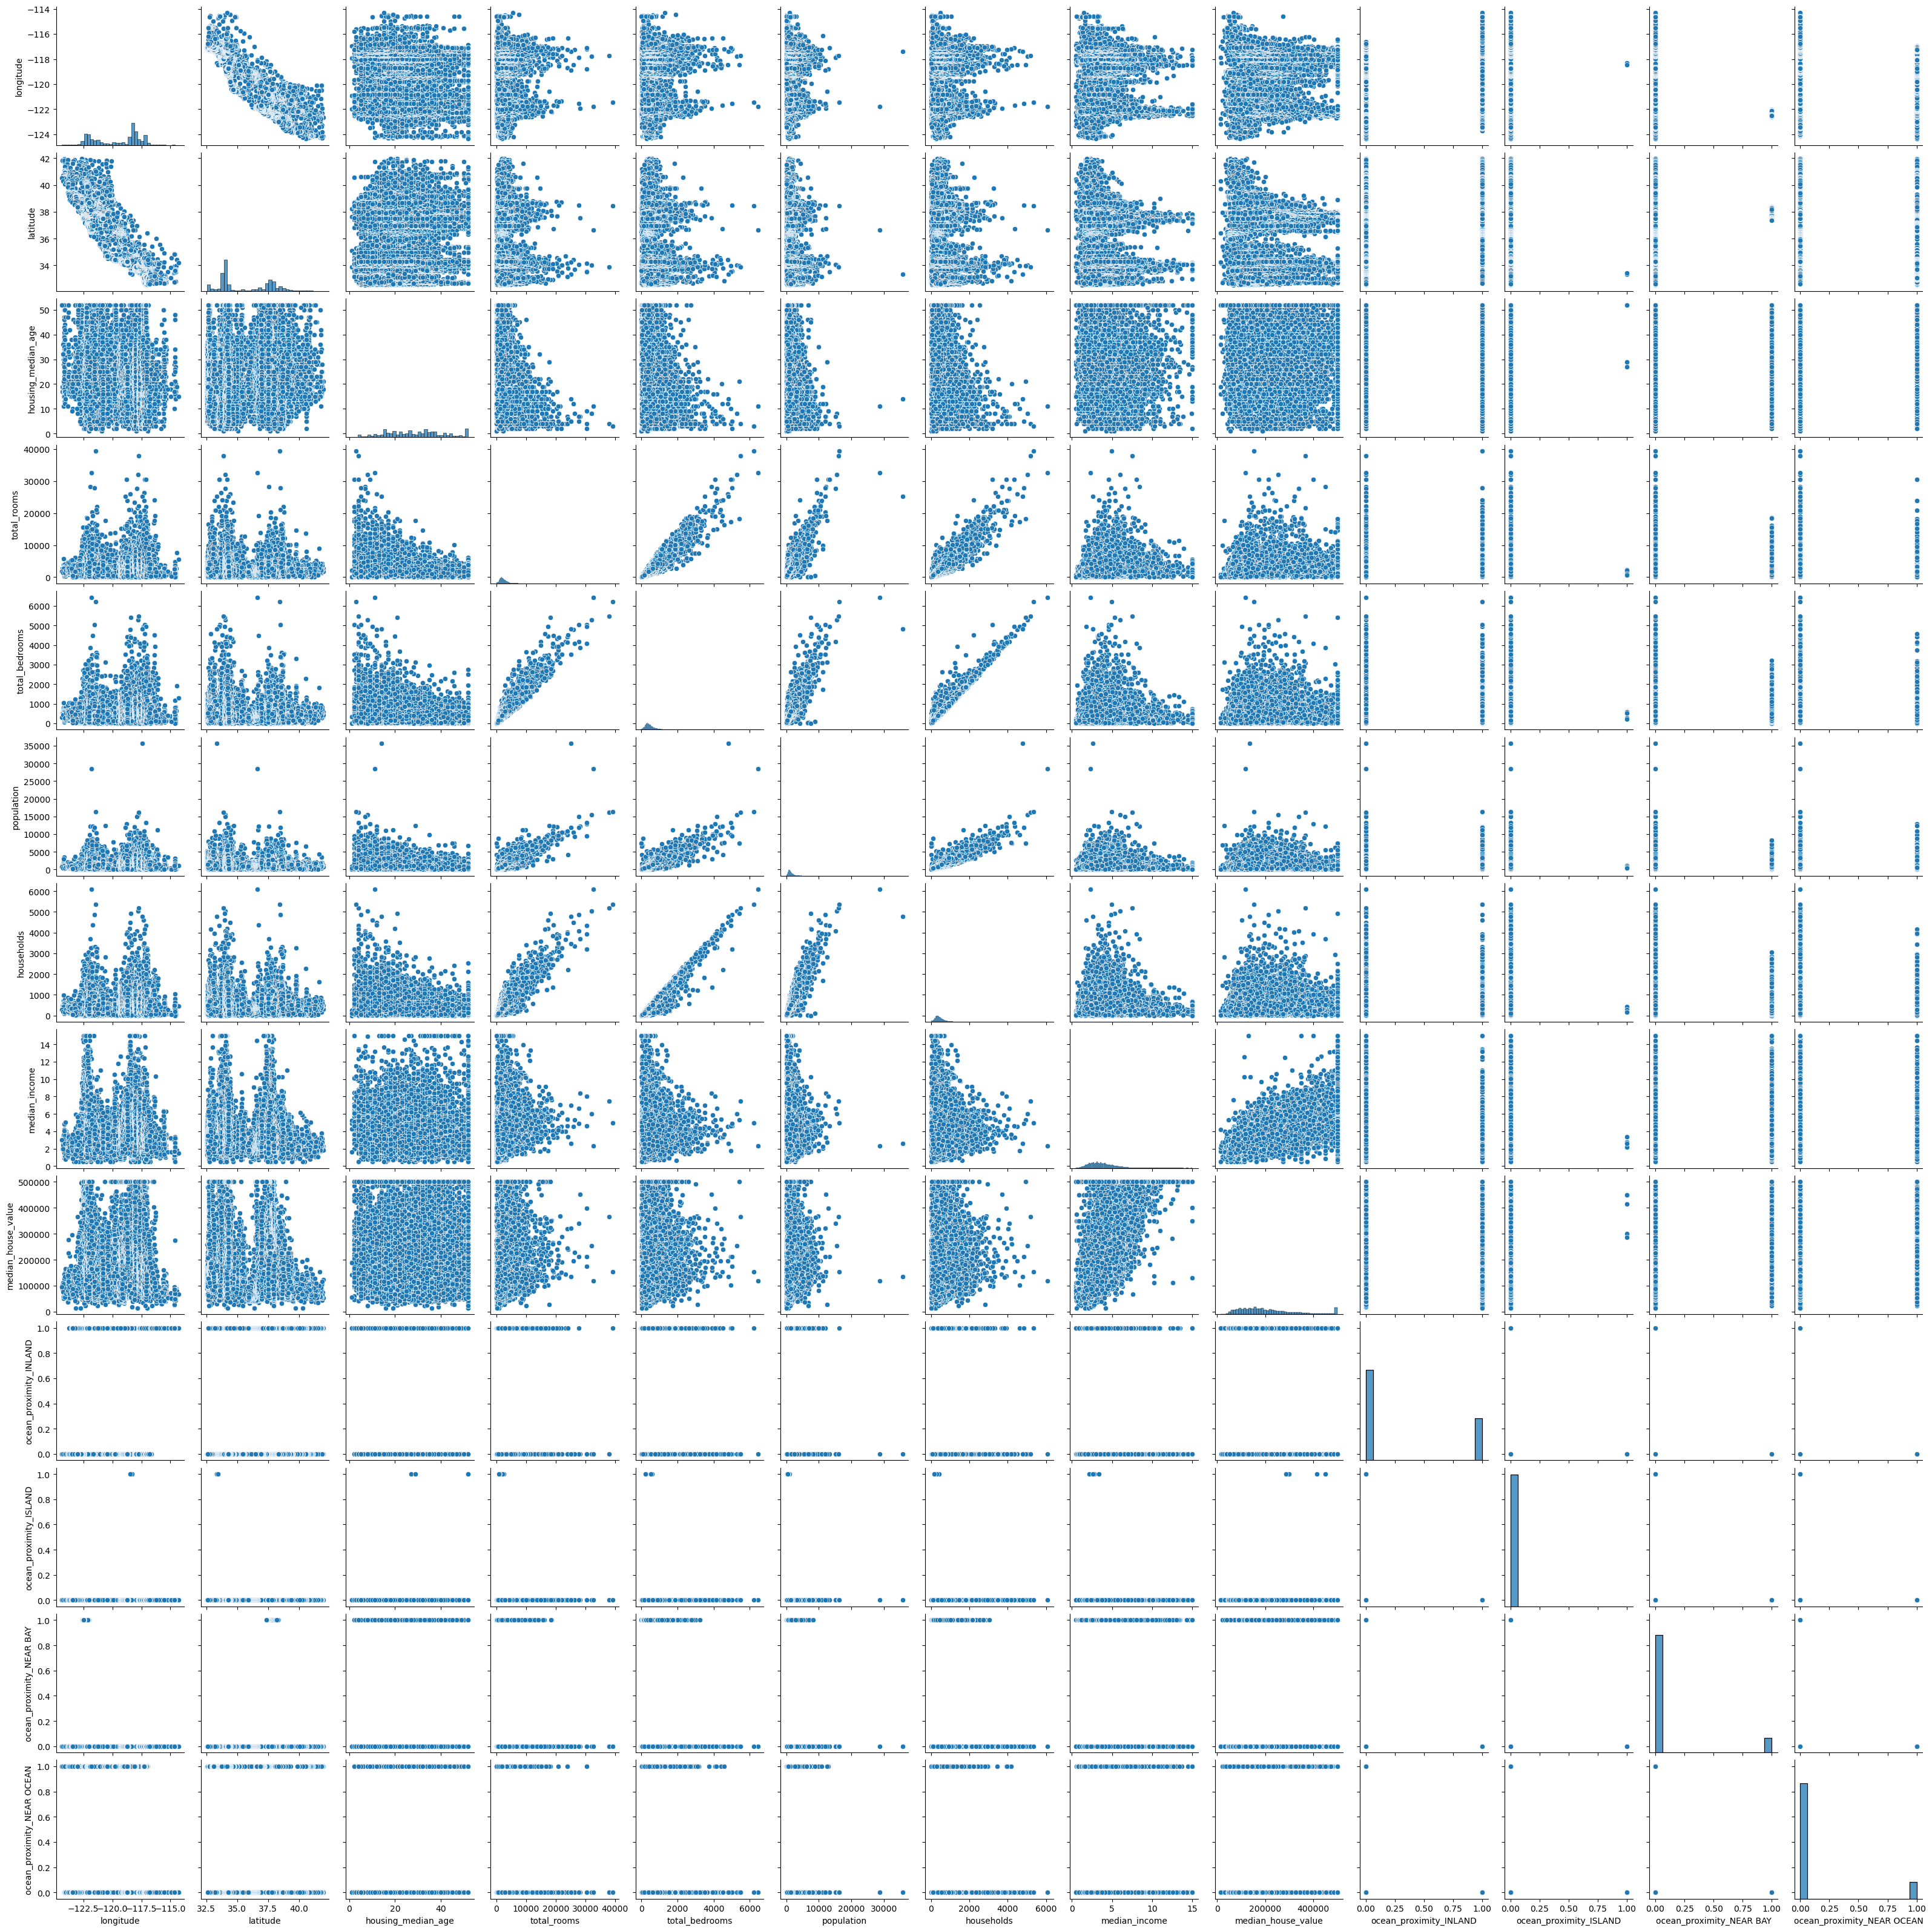

In [16]:
sns.pairplot(data)
plt.show()

In [52]:
scaler = MinMaxScaler()
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<Axes: >

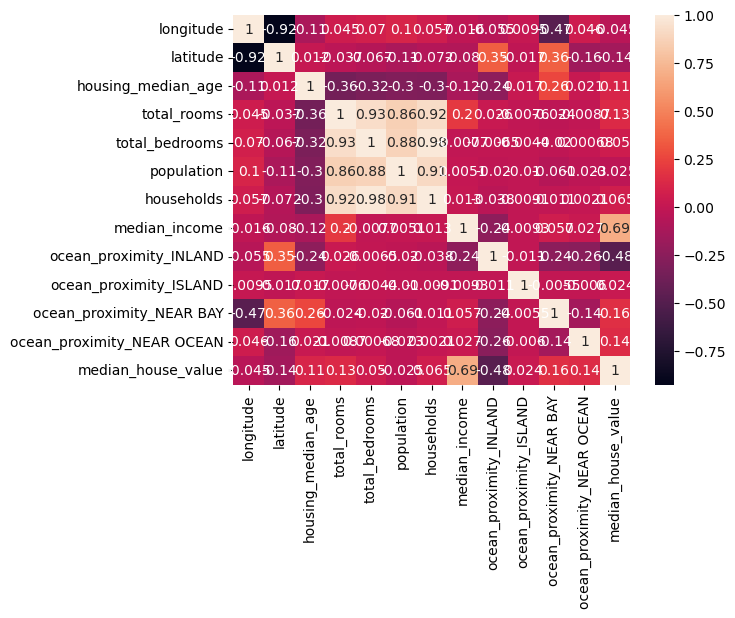

In [56]:
df = X.copy()
df['median_house_value'] = y

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

Text(0, 0.5, 'median1-house_value')

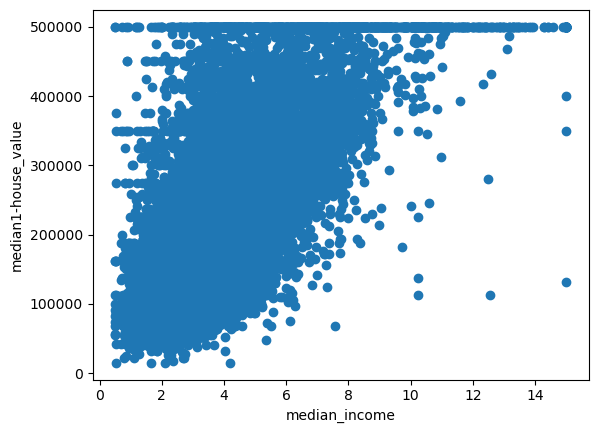

In [54]:
plt.scatter(df["median_income"], df["median_house_value"])
plt.xlabel("median_income")
plt.ylabel("median1-house_value")

In [57]:
model_lr = LinearRegression()


scores_lr = cross_validate(model_lr, X_train, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_lr))
print('RMSE:', np.sqrt(np.mean(-scores_lr)))

RMSE for each iteration: [67201.92123224 68526.7478616  70291.64606743]
RMSE: 68685.10002579456


In [59]:
forest = RandomForestRegressor(random_state=42)
param_grid = { 
    'n_estimators': [10, 50],
    'max_depth': [None, 5],
}
forest_reg = GridSearchCV(forest, param_grid=param_grid, cv=5)
forest_reg.fit(X_train, y_train)

print("Best parameters found: ", forest_reg.best_params_)

scores_forest = cross_validate(forest_reg.best_estimator_, X_train, y_train, cv=3, scoring='neg_mean_squared_error')['test_score']
print('RMSE for each iteration:', np.sqrt(-scores_forest))
print('RMSE:', np.sqrt(np.mean(-scores_forest)))

Best parameters found:  {'max_depth': None, 'n_estimators': 50}
RMSE for each iteration: [49962.52934929 49929.86252429 51371.71316192]
RMSE: 50425.84794813064


In [58]:
lasso = Lasso()
hyper_param_lasso = {'alpha':(0.01, 1, 2, 5, 10)}
lasso_reg = GridSearchCV(lasso, hyper_param_lasso, cv = 5)
# Fit the gridsearch to use the best hyperparameter in our cross validation
lasso_reg.fit(X_train, y_train)

print(lasso_reg.best_params_)

scores_lasso = cross_validate(lasso_reg, X_train, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_lasso))
print('RMSE:', np.sqrt(np.mean(-scores_lasso)))

{'alpha': 5}
RMSE for each iteration: [67288.98049677 68522.86563737 70279.50498729]
RMSE: 68708.0752961648


In [60]:
#RandomForestRegressor gav lägst RMSE
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
print(np.mean(y_test))

207744.35771959872


<Axes: >

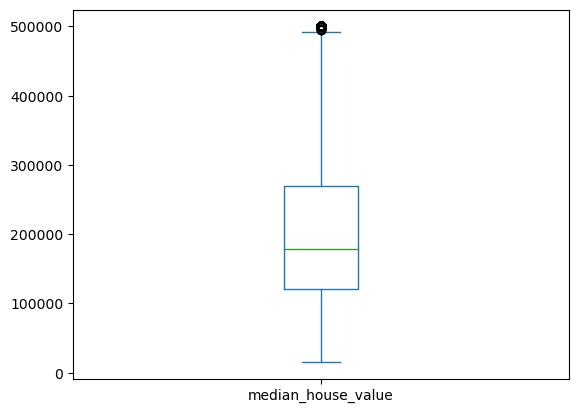

In [62]:
y_test.plot.box()

In [63]:
y_test_pred_lr = forest.predict(X_test)
RMSE_test_data = mean_squared_error(y_test, y_test_pred_lr, squared = False)
print(RMSE_test_data)

48777.72753346401


In [64]:
(RMSE_test_data)/(np.mean(y_test))

0.234796882422681